In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import seaborn as sns

##### Read refugees dataset

In [3]:
refugees_df = pd.read_csv("data/refugees.csv")
refugees_df.head()

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Other people in need of international protection,Stateless persons,Host Community,Others of concern
0,1951,Unknown,UNK,Australia,AUS,180000,0,0,-,0,-,0
1,1951,Unknown,UNK,Austria,AUT,282000,0,0,-,0,-,0
2,1951,Unknown,UNK,Belgium,BEL,55000,0,0,-,0,-,0
3,1951,Unknown,UNK,Canada,CAN,168511,0,0,-,0,-,0
4,1951,Unknown,UNK,Denmark,DNK,2000,0,0,-,0,-,0


### Linear regression on number of refugees per year

In [33]:
total_refugees_per_year = refugees_df[["Year", "Refugees under UNHCR's mandate"]].groupby('Year').sum().reset_index()
total_refugees_per_year.head()

,Year,Refugees under UNHCR's mandate
0,1951,2116011
1,1952,1952928
2,1953,1847304
3,1954,1749628
4,1955,1717966


In [64]:
X = np.array(total_refugees_per_year[['Year']])
y = np.array(total_refugees_per_year[["Refugees under UNHCR's mandate"]])

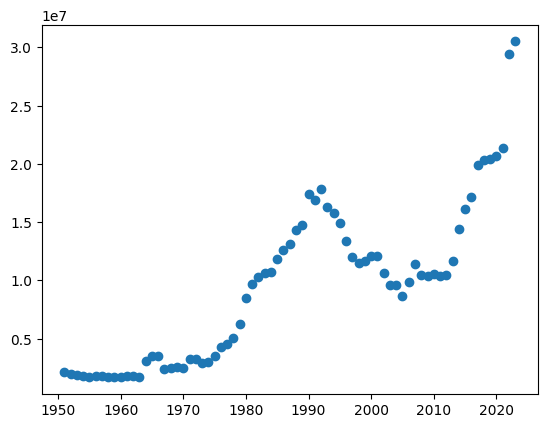

In [60]:
plt.scatter(X, y)
plt.show()

In [61]:
from sklearn.linear_model import LinearRegression

In [79]:
N = X.shape[0]
training_set_size = int(0.8 * N)
train_idx = np.random.choice(N, size=training_set_size, replace=False)
train_X, train_y = X[train_idx], y[train_idx]
test_X, test_y = np.delete(X, train_idx, axis=0), np.delete(y, train_idx, axis=0)

In [86]:
model = LinearRegression()
model.fit(train_X, train_y)
model.score(test_X, test_y)

0.5735271768780452

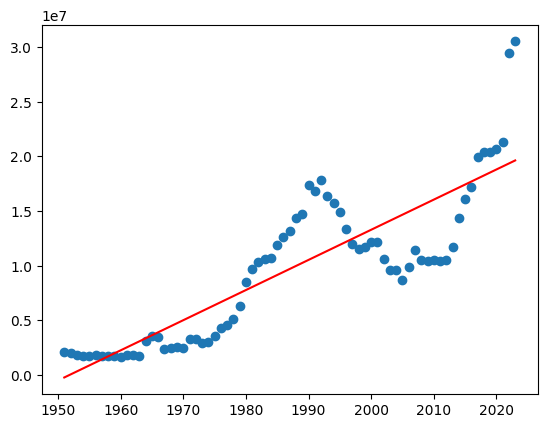

In [91]:
results = model.predict(X)
plt.scatter(X, y)
plt.plot(X, results, '-r')
plt.show()

#### Polynomial regression

In [92]:
from sklearn.preprocessing import PolynomialFeatures

In [151]:
deg = 91
poly_X = PolynomialFeatures(degree=deg, include_bias=False).fit_transform(X)
poly_train_X = PolynomialFeatures(degree=deg, include_bias=False).fit_transform(train_X)
poly_test_X = PolynomialFeatures(degree=deg, include_bias=False).fit_transform(test_X)

poly_model = LinearRegression()

poly_model.fit(poly_train_X, train_y)
poly_model.score(poly_test_X, test_y)

0.876265613027519

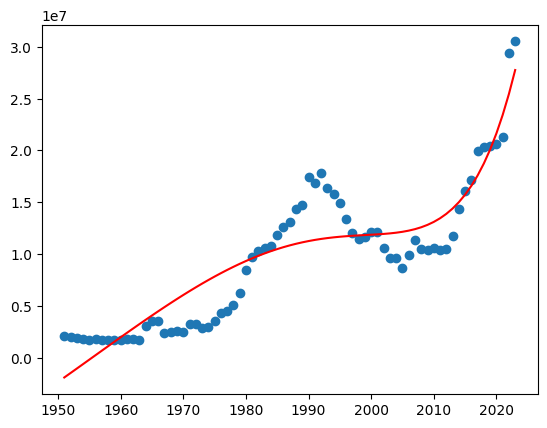

In [152]:
poly_results = poly_model.predict(poly_X)
plt.scatter(X, y)
plt.plot(X, poly_results, '-r')
plt.show()

### Linear regression on number of refugees for asylum countries

In [163]:
refugees_per_country_and_year = refugees_df[['Year', 'Country of asylum', "Refugees under UNHCR's mandate"]].groupby(
    ['Country of asylum', 'Year']).sum().reset_index()

In [164]:
refugees_per_country_and_year.head()

,Country of asylum,Year,Refugees under UNHCR's mandate
0,Afghanistan,1990,50
1,Afghanistan,1991,38
2,Afghanistan,1992,60025
3,Afghanistan,1993,32131
4,Afghanistan,1994,19134


In [180]:
all_countries = pd.unique(refugees_per_country_and_year['Country of asylum'])

##### Poland

In [186]:
refugees_in_poland = refugees_per_country_and_year[refugees_per_country_and_year['Country of asylum'] == 'Poland']
refugees_in_poland

,Country of asylum,Year,Refugees under UNHCR's mandate
5250,Poland,1991,550
5251,Poland,1992,2719
5252,Poland,1993,810
5253,Poland,1994,393
5254,Poland,1995,600
5255,Poland,1996,600
5256,Poland,1997,835
5257,Poland,1998,895
5258,Poland,1999,937
5259,Poland,2000,1011


In [201]:
X = np.array(refugees_in_poland[['Year']])
y = np.array(refugees_in_poland[["Refugees under UNHCR's mandate"]])

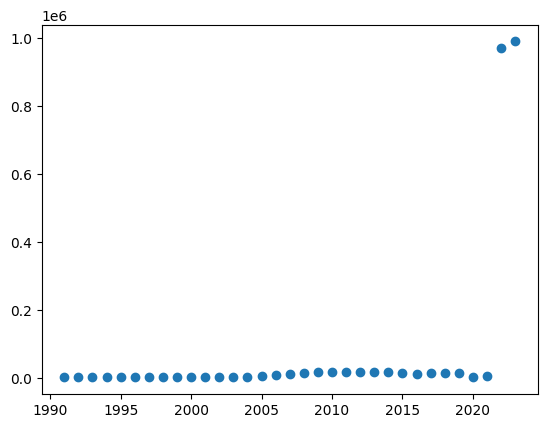

In [202]:
plt.scatter(X, y)
plt.show()

In [199]:
N = X.shape[0]
training_set_size = int(0.8 * N)
train_idx = np.random.choice(N, size=training_set_size, replace=False)
train_X, train_y = X[train_idx], y[train_idx]
test_X, test_y = np.delete(X, train_idx, axis=0), np.delete(y, train_idx, axis=0)

In [207]:
deg = 3
poly_X = PolynomialFeatures(degree=deg, include_bias=False).fit_transform(X)
poly_train_X = PolynomialFeatures(degree=deg, include_bias=False).fit_transform(train_X)
poly_test_X = PolynomialFeatures(degree=deg, include_bias=False).fit_transform(test_X)

poly_model = LinearRegression()

poly_model.fit(poly_train_X, train_y)
poly_model.score(poly_test_X, test_y)

0.8910831541498226

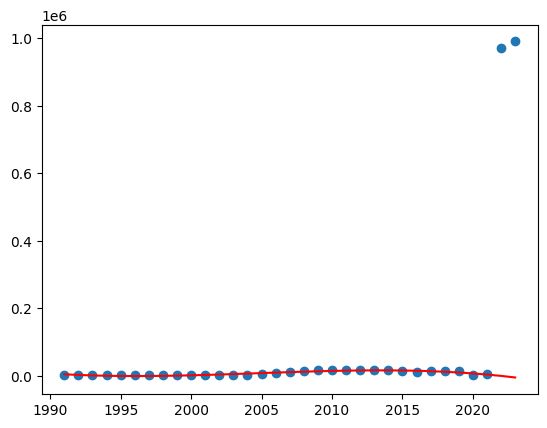

In [210]:
poly_results = poly_model.predict(poly_X)
plt.scatter(X, y)
plt.plot(X, poly_results, '-r')
plt.show()

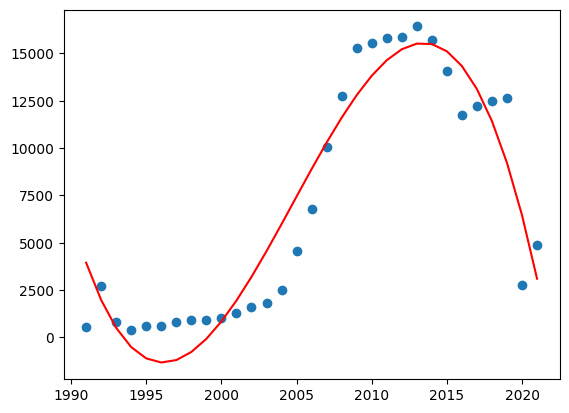

In [208]:
poly_results = poly_model.predict(poly_X)
plt.scatter(X[:-2], y[:-2])
plt.plot(X[:-2], poly_results[:-2], '-r')
plt.show()

##### Germany

In [211]:
refugees_in_germany = refugees_per_country_and_year[refugees_per_country_and_year['Country of asylum'] == 'Germany']
refugees_in_germany

,Country of asylum,Year,Refugees under UNHCR's mandate
2651,Germany,1951,265000
2652,Germany,1952,240000
2653,Germany,1953,228000
2654,Germany,1954,225000
2655,Germany,1955,219000
...,...,...,...
2719,Germany,2019,1146682
2720,Germany,2020,1210596
2721,Germany,2021,1255694
2722,Germany,2022,2075445


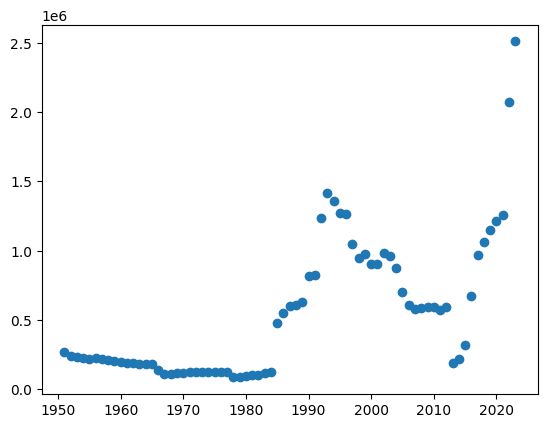

In [214]:
X = np.array(refugees_in_germany[['Year']])
y = np.array(refugees_in_germany[["Refugees under UNHCR's mandate"]])

plt.scatter(X, y)
plt.show()

In [267]:
N = X.shape[0]
training_set_size = int(0.9 * N)
train_idx = np.random.choice(N, size=training_set_size, replace=False)
train_X, train_y = X[train_idx], y[train_idx]
test_X, test_y = np.delete(X, train_idx, axis=0), np.delete(y, train_idx, axis=0)

deg = 4
poly_X = PolynomialFeatures(degree=deg, include_bias=False).fit_transform(X)
poly_train_X = PolynomialFeatures(degree=deg, include_bias=False).fit_transform(train_X)
poly_test_X = PolynomialFeatures(degree=deg, include_bias=False).fit_transform(test_X)

poly_model = LinearRegression()

poly_model.fit(poly_train_X, train_y)
poly_model.score(poly_test_X, test_y)

0.966977585981544

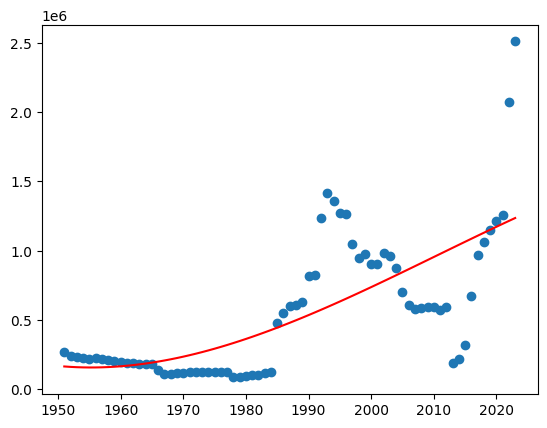

In [268]:
poly_results = poly_model.predict(poly_X)
plt.scatter(X, y)
plt.plot(X, poly_results, '-r')
plt.show()